# Lab 2 | Harmonics

### Made by Dmitriy Sokolov, 3530901/00203

Firstly, prepare the environment

In [90]:
from labs.install_deps import require_think_dsp

require_think_dsp()

thinkdsp.py successfully download


-----
### Part 1

Now we are assigned to define **SawtoothSignal** class, which is successor of Signal (Sinusoid) class.
This signal repeatedly grows linear in range [-1; 1], and then faster, but also linear, fall to -1.

In [91]:
from labs.thinkdsp import Sinusoid
from labs.thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

And create sawtooth wave:

In [92]:
sawtooth = SawtoothSignal().make_wave(duration=1.0, framerate=50000)
sawtooth.make_audio()

The spectrum of the sawtooth signal:

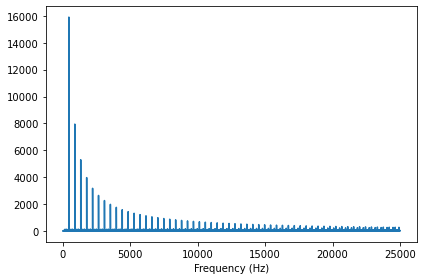

In [93]:
from labs.thinkdsp import decorate
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

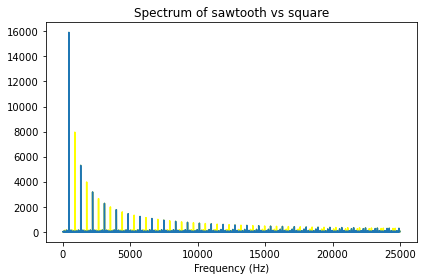

In [94]:
from labs.thinkdsp import SquareSignal

# compare sawtooth and square spectrum
sawtooth.make_spectrum().plot(color='yellow')
square = SquareSignal(amp=0.5).make_wave(duration=1, framerate=50000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)', title='Spectrum of sawtooth vs square')

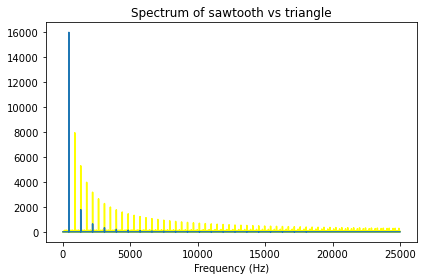

In [95]:
from labs.thinkdsp import TriangleSignal

# compare sawtooth and triangle spectrum
sawtooth.make_spectrum().plot(color='yellow')
triangle = TriangleSignal(amp=0.79).make_wave(duration=1, framerate=50000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)', title='Spectrum of sawtooth vs triangle')

Comparing the **sawtooth** signal with a **triangle** and a **square** signal, in contrast with square signal (which has only even harmonics), *the sawtooth has both even and odd harmonics**, and *like square signal it has similar decreasing rate*.
The sawtooth signal, in contrast with a triangle one, its decreasing rate is lower and smoother (*triangle signal rapidly decreasing*)

-----
### Part 2

Create the square (rectangle) signal (1100 Hz) and compute wave on samples equal 10k per second.
And find the spectrum

In [96]:
square = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)

It's spectrum:

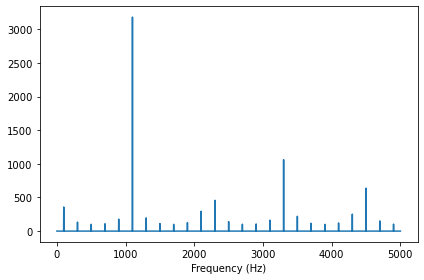

In [97]:
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

We can see fundamental frequency at 1100 Hz, next is at 3300 Hz, next one is at 4500 (aliased after 5000 Hz, but initially should be at 5500 Hz), next - 2300 Hz (but should be at 7700 Hz), 100 Hz (9900 Hz in case if no aliasing).
After that, we can see repeated aliasing on 0 Hz - to 100 Hz and so on.

In [98]:
square.make_audio()

------
### Part 3

Here we should take `Spectrum` and print some first values of `spectrum.fs`.

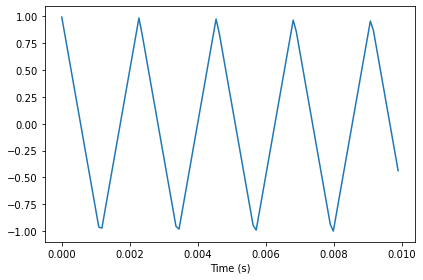

In [99]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Time (s)')

The first `hs` value - `spectrum.hs[0]` is close to zero:

In [100]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

In [101]:
from cmath import polar
(ampl, phase) = polar(spectrum.hs[0])
print("Phase:", phase)
print("Amplitude:", ampl)

Phase: 0.0
Amplitude: 1.0436096431476471e-14


Phase: 0.0
Amplitude: 100.0


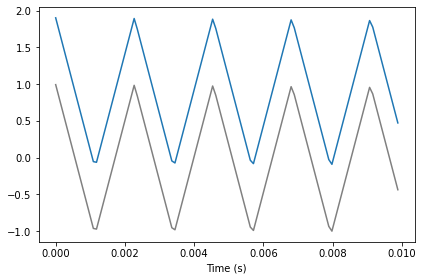

In [102]:
spectrum.hs[0] = 100

(ampl, phase) = polar(spectrum.hs[0])
print("Phase:", phase)
print("Amplitude:", ampl)

triangle.plot(color='gray')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

-----
### Part 4

Here we need to write a function which depends on `Spectrum` and changes it by division of each `hs` on current `fs` frequency

In [103]:
def filter_spectrum(spectrum):
    """Divides the spectrum through by the fs.

    spectrum: Spectrum object
    """
    # avoid division by 0
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

Test this function:

In [104]:
wave = SquareSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

And filter frequencies:

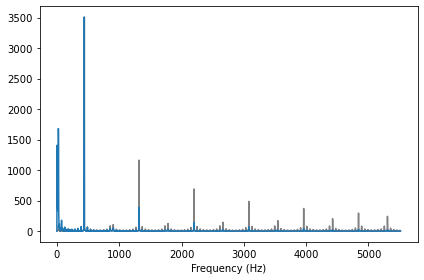

In [105]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

The square wave now sounds almost like a sine wave:

In [106]:
filtered = spectrum.make_wave()
filtered.make_audio()

-----
### Part 5

We need to achieve both even and odd harmonics, but falling similar with `1/f^2` (unlike with square - `1/f`).
We will use the way with sum of cos signals:

In [107]:
from labs.thinkdsp import CosSignal

freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))

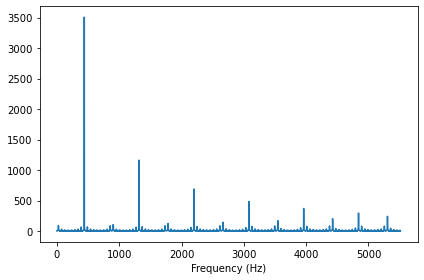

In [108]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

The sound of the signal:

In [109]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

And its waveform:

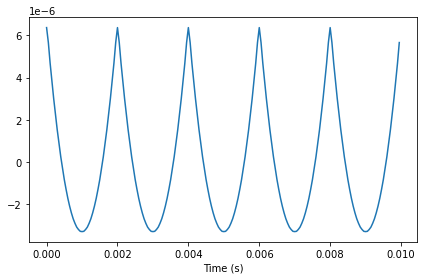

In [110]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')